In [47]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Load the data
file_path = "charging_station_simulation_data.csv"  # Path to the CSV file
data = pd.read_csv(file_path, encoding='utf-8')

# Display the first 5 rows
print(data.head())

# General information about the dataset
print(data.info())

# Basic statistics
print(data.describe())

  station_id    region   latitude  longitude  capacity type  avg_daily_usage  \
0    ST-1409  Istanbul  40.995654  29.023471        12   AC            63.92   
1    ST-2679    Ankara  39.930666  32.819702         6   DC            29.36   
2    ST-2535  Istanbul  40.964008  29.015018        10   AC            56.07   
3    ST-1434   Antalya  36.917707  30.665358        10   DC            78.19   
4    ST-5557     Bursa  40.216044  29.039034         4   AC            30.91   

   peak_hour_usage  population_density  
0               58                2870  
1               34                1500  
2               94                2870  
3               58                 750  
4               84                1100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_id          50 non-null     object 
 1   region             

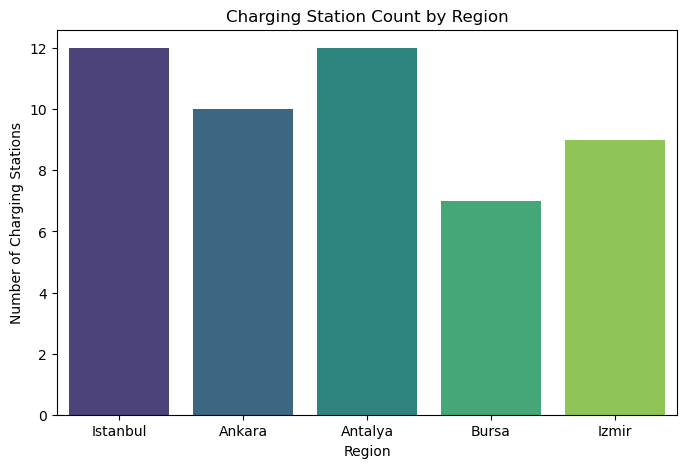

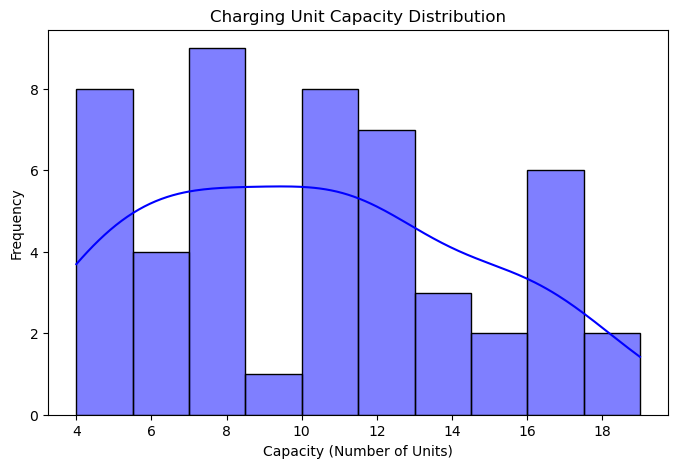

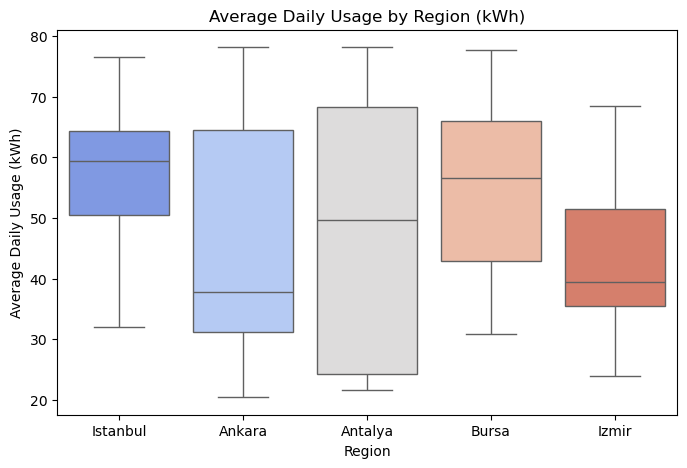

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Charging station count by region
plt.figure(figsize=(8, 5))
sns.countplot(x="region", data=data, palette="viridis")
plt.title("Charging Station Count by Region")
plt.xlabel("Region")
plt.ylabel("Number of Charging Stations")
plt.show()

# Capacity distribution
plt.figure(figsize=(8, 5))
sns.histplot(data["capacity"], bins=10, kde=True, color="blue")
plt.title("Charging Unit Capacity Distribution")
plt.xlabel("Capacity (Number of Units)")
plt.ylabel("Frequency")
plt.show()

# Average daily usage by region
plt.figure(figsize=(8, 5))
sns.boxplot(x="region", y="avg_daily_usage", data=data, palette="coolwarm")
plt.title("Average Daily Usage by Region (kWh)")
plt.xlabel("Region")
plt.ylabel("Average Daily Usage (kWh)")
plt.show()

In [51]:
import folium

# Create a base map
map_center = [data["latitude"].mean(), data["longitude"].mean()]
charging_map = folium.Map(location=map_center, zoom_start=6)

# Add charging stations to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=f"Region: {row['region']}<br>Capacity: {row['capacity']}<br>Avg Daily Usage: {row['avg_daily_usage']} kWh",
    ).add_to(charging_map)

# Save the map as an HTML file
charging_map.save("charging_stations_map.html")
charging_map

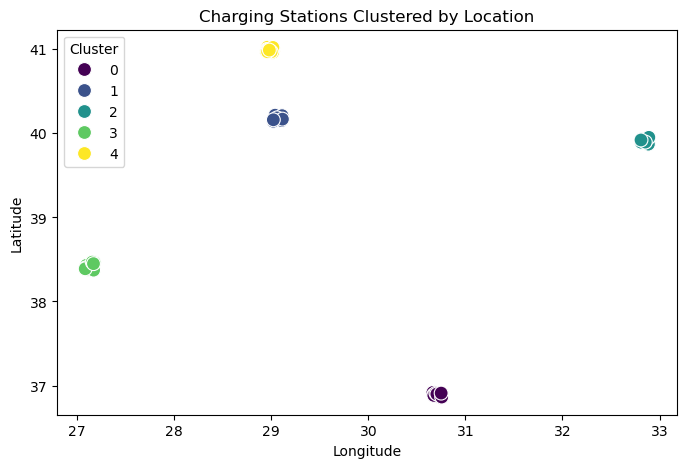

In [53]:
from sklearn.cluster import KMeans
import numpy as np

# Features for clustering
features = data[["latitude", "longitude"]]

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data["cluster"] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="longitude", y="latitude", hue="cluster", data=data, palette="viridis", s=100
)
plt.title("Charging Stations Clustered by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()


In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = data[["population_density", "capacity"]]
y = data["avg_daily_usage"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 297.38991731671024
R-squared: 0.015716002592540357
